In [79]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import homogeneity_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.random_projection import GaussianRandomProjection
from sklearn import utils
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import homogeneity_completeness_v_measure

In [11]:
def preprocess_data(data):
    ''' Change the categorical columns to numeric '''
    data = data.dropna()
    data = data.drop_duplicates()
    for column in data.columns:
        if data[column].dtype == object:
            data[column] = data[column].astype('category').cat.codes
    return data

In [18]:
cancer = pd.read_csv("wdbc.csv")
cancer = preprocess_data(cancer)
cancer.head()
cancer_y = cancer["Diagnosis"]
cancer_x = cancer.drop(["Diagnosis"], axis=1)
cancer_x.head()

,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
def plot_silhouette(X):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    avgs = []
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        #fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        plt.xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        avgs.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.show()
    avg_df = [({'number of clusters': i+2,'silhouette score': a}) for i,a in enumerate(avgs)]
    avg_df = pd.DataFrame(avg_df)
    return avg_df

For n_clusters = 2 The average silhouette_score is : 0.697264615605947


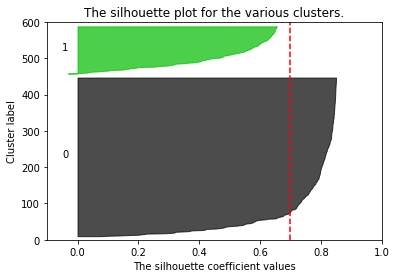

For n_clusters = 3 The average silhouette_score is : 0.6660201620263432


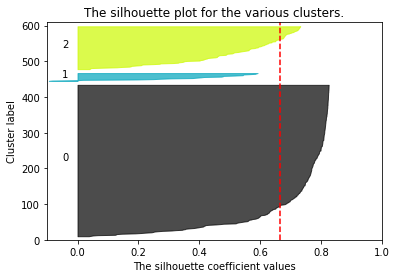

For n_clusters = 4 The average silhouette_score is : 0.5334614737117155


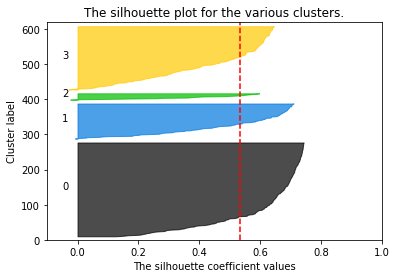

For n_clusters = 5 The average silhouette_score is : 0.5102292997907869


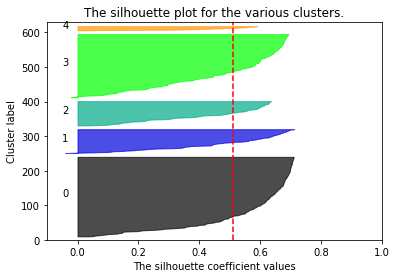

For n_clusters = 6 The average silhouette_score is : 0.48454260838511565


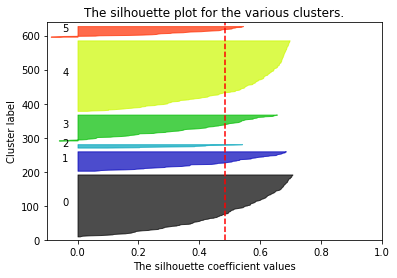

For n_clusters = 7 The average silhouette_score is : 0.46791697431887147


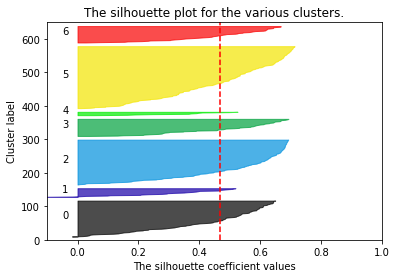

For n_clusters = 8 The average silhouette_score is : 0.47199936768871753


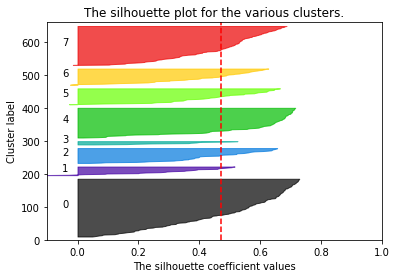

,number of clusters,silhouette score
0,2,0.697265
1,3,0.666020
2,4,0.533461
3,5,0.510229
4,6,0.484543
5,7,0.467917
6,8,0.471999


In [74]:
plot_silhouette(cancer_x)

In [81]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults_data = pd.read_csv(url,
                         header=None,
                         names=['age', 'workclass','fnlwgt','education','education_num','maritalstatus',
                                'occupation','relationship','race','sex','capital_gain','capital_loss',
                                'hours_per_week','native_country', 'income'],
                         na_values = ' ?')
adults_data = preprocess_data(adults_data)

In [82]:
adults_x = adults_data.drop(["income"], axis=1)
adults_y = adults_data['income']

For n_clusters = 2 The average silhouette_score is : 0.5846013967583918


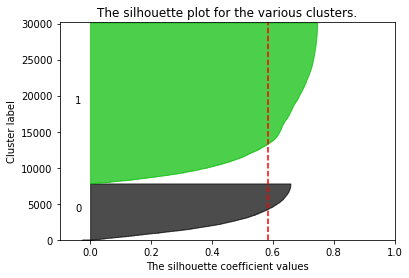

For n_clusters = 3 The average silhouette_score is : 0.552485222461881


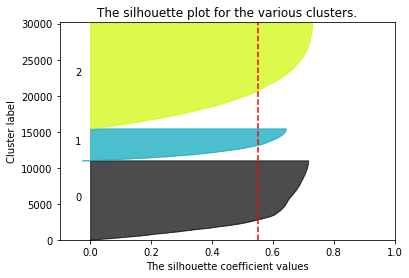

For n_clusters = 4 The average silhouette_score is : 0.55711076929609


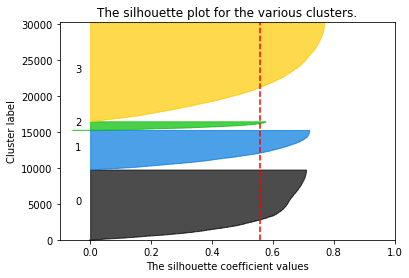

For n_clusters = 5 The average silhouette_score is : 0.5321578323991091


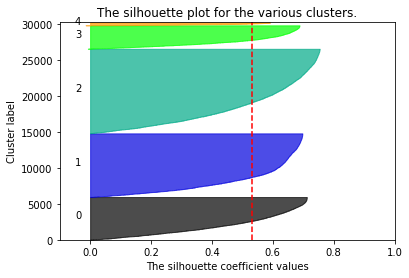

For n_clusters = 6 The average silhouette_score is : 0.5434707417727556


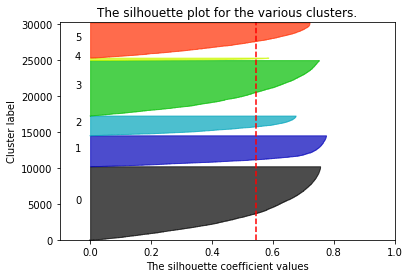

For n_clusters = 7 The average silhouette_score is : 0.5453106404288661


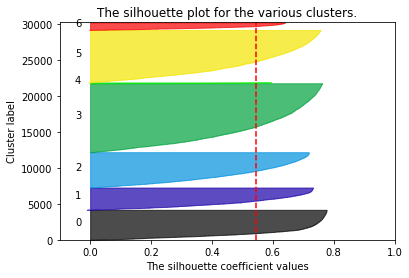

For n_clusters = 8 The average silhouette_score is : 0.5387759597201337


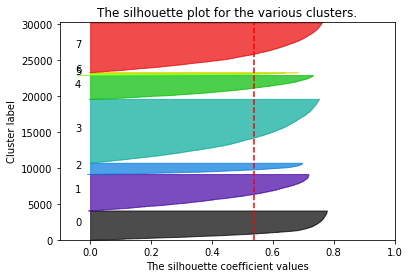

,number of clusters,silhouette score
0,2,0.584601
1,3,0.552485
2,4,0.557111
3,5,0.532158
4,6,0.543471
5,7,0.545311
6,8,0.538776


In [83]:
plot_silhouette(adults_x)